In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [38]:
df = pd.read_excel(r'C:\Users\Gexec\Desktop\New folder\New folder\Econometrics2022\Survey.xlsx')

In [39]:
df.head()

,interview__key,date_q,hh_02,settlement,members,memnal,weight,fdpurch,fdcons,fdout,...,hous_29_2n,hous_29_3n,hous_29_4n,hous_29_5n,hous_29_6n,hous_39,hous_44,soc_01,soc_05,hous_47_8
0,00-02-43-24,2019.09,6,1,4,4,156.330247,16142.559524,130.357143,0.0,...,0.0,0.0,0.0,0.0,1.0,1,4,2,NaN,NaN
1,00-02-53-94,2019.11,7,1,1,1,199.569444,15403.869048,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,1,3,2,NaN,1.0
2,00-02-68-45,2019.11,1,1,1,1,164.703704,44234.523810,0.000000,0.0,...,1.0,1.0,0.0,0.0,0.0,1,3,2,NaN,1.0
3,00-09-10-75,2019.11,8,1,3,3,185.768519,34283.928571,76.041667,0.0,...,0.0,1.0,0.0,0.0,0.0,1,3,2,NaN,NaN
4,00-10-58-42,2019.03,8,2,5,5,126.657407,22530.059524,12678.363641,0.0,...,0.0,1.0,0.0,0.0,0.0,2,5,1,NaN,1.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 65 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   interview__key    5165 non-null   object 
 1   date_q            5165 non-null   float64
 2   hh_02             5165 non-null   int64  
 3   settlement        5165 non-null   int64  
 4   members           5165 non-null   int64  
 5   memnal            5165 non-null   int64  
 6   weight            5165 non-null   float64
 7   fdpurch           5165 non-null   float64
 8   fdcons            5165 non-null   float64
 9   fdout             5165 non-null   float64
 10  Z1                5165 non-null   float64
 11  nfdpurch          5165 non-null   float64
 12  nonfdgif          5165 non-null   float64
 13  durble            5165 non-null   float64
 14  expend            5165 non-null   float64
 15  monincome         5165 non-null   float64
 16  totincome         5165 non-null   float64


In [41]:
df.isnull().sum()

interview__key       0
date_q               0
hh_02                0
settlement           0
members              0
                  ... 
hous_39              0
hous_44              0
soc_01               0
soc_05            4593
hous_47_8         1823
Length: 65, dtype: int64

In [42]:
df.columns

Index(['interview__key', 'date_q', 'hh_02', 'settlement', 'members', 'memnal',
       'weight', 'fdpurch', 'fdcons', 'fdout', 'Z1', 'nfdpurch', 'nonfdgif',
       'durble', 'expend', 'monincome', 'totincome', 'nonmoninc',
       'y1_3amd.1.00', 'y1_3amd.2.00', 'y1_3amd.3.00', 'y1_3amd.4.00',
       'y1_3amd.6.00', 'y1_3amd.8.00', 'y1_3amd.9.00', 'y1_3amd.10.00',
       'y1_3amd.13.00', 'y1_3amd.14.00', 'y1_3amd.15.00', 'y1_3amd.17.00',
       'y1_3amd.18.00', 'y1_3amd.19.00', 'y1_3amd.23.00', 'y1_3amd.28.00',
       'hhch_0_3_sum', 'hhch_4_5_sum', 'hhch_6_11_sum', 'hhch_12_17_sum',
       'hheld_63_65_sum', 'hheld_66_70_sum', 'hheld_71_80_sum',
       'hheld_over81_sum', 'hheld_over63_sum', 'headsex', 'headeduc',
       'headmerstatus', 'headage', 'aec_r', 'poverty', 'pweight', 'ae_r',
       'hous_01', 'hous_13', 'hous_16', 'hous_29_1n', 'hous_29_2n',
       'hous_29_3n', 'hous_29_4n', 'hous_29_5n', 'hous_29_6n', 'hous_39',
       'hous_44', 'soc_01', 'soc_05', 'hous_47_8'],
      dty

In [43]:
to_numeric =['soc_01', 'soc_05', 'hous_47_8']

In [44]:
df['soc_01'].values

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [45]:
for col in to_numeric:
    df[col] = pd.to_numeric(df[col], errors="ignore")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 65 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   interview__key    5165 non-null   object 
 1   date_q            5165 non-null   float64
 2   hh_02             5165 non-null   int64  
 3   settlement        5165 non-null   int64  
 4   members           5165 non-null   int64  
 5   memnal            5165 non-null   int64  
 6   weight            5165 non-null   float64
 7   fdpurch           5165 non-null   float64
 8   fdcons            5165 non-null   float64
 9   fdout             5165 non-null   float64
 10  Z1                5165 non-null   float64
 11  nfdpurch          5165 non-null   float64
 12  nonfdgif          5165 non-null   float64
 13  durble            5165 non-null   float64
 14  expend            5165 non-null   float64
 15  monincome         5165 non-null   float64
 16  totincome         5165 non-null   float64


In [47]:
df.describe()

,date_q,hh_02,settlement,members,memnal,weight,fdpurch,fdcons,fdout,Z1,...,hous_29_2n,hous_29_3n,hous_29_4n,hous_29_5n,hous_29_6n,hous_39,hous_44,soc_01,soc_05,hous_47_8
count,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,...,5107.000000,5149.000000,5092.000000,5090.000000,5093.000000,5165.000000,5165.000000,5165.000000,572.000000,3342.000000
mean,2019.065202,4.890997,1.374637,3.611617,3.409681,155.532817,54702.727893,8497.762933,2825.854441,3622.937588,...,0.186019,0.478928,0.001375,0.007662,0.340860,1.532043,2.904937,1.881897,877.486014,1.238181
std,0.034425,3.343538,0.484076,1.954404,1.894543,73.313942,41767.069890,15846.047589,10181.098053,2475.731163,...,0.389160,0.499604,0.037055,0.087206,0.474045,0.808306,0.740852,0.322761,17632.243041,0.482687
min,2019.010000,1.000000,1.000000,1.000000,1.000000,21.481481,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2019.040000,1.000000,1.000000,2.000000,2.000000,109.824074,25550.000000,0.000000,0.000000,1914.077381,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,3.000000,1.000000
50%,2019.070000,5.000000,1.000000,3.000000,3.000000,156.330247,44611.111111,1064.583333,0.000000,3017.656198,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,6.000000,1.000000
75%,2019.100000,8.000000,2.000000,5.000000,5.000000,192.638889,72761.011905,10430.597342,0.000000,4569.582184,...,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,3.000000,2.000000,10.000000,1.000000
max,2019.120000,11.000000,2.000000,15.000000,15.000000,326.879630,499923.263889,147600.133929,234642.857143,22711.973253,...,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,2.000000,420000.000000,3.000000


In [48]:
df.groupby('date_q')[['weight', 'fdpurch', 'members']].median()

,weight,fdpurch,members
date_q,,,
2019.01,156.330247,38694.345238,3.0
2019.02,153.554012,41171.130952,4.0
2019.03,153.554012,41507.886905,4.0
2019.04,153.554012,45909.947345,4.0
2019.05,153.554012,43984.672619,3.0
2019.06,153.554012,44516.964286,3.0
2019.07,153.554012,45222.077922,3.0
2019.08,153.554012,46663.906926,3.5
2019.09,153.554012,45701.041667,4.0


In [49]:
df['weight'].values

array([156.330247, 199.569444, 164.703704, ...,  21.481481, 126.657407,
       294.296296])

In [50]:
for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    if col == 'weight':
        guess_values = df.groupby('date_q')['weight'].apply(lambda x: x.mode().max())
    else:
        guess_values = df.groupby('date_q')[col].median()
    for region in df['date_q'].unique():
        df[col].loc[(df[col].isnull())&(df['date_q']==region)] = guess_values[region]

C:\Users\Gexec\AppData\Local\Temp\ipykernel_11168\2691080528.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].loc[(df[col].isnull())&(df['date_q']==region)] = guess_values[region]
C:\Users\Gexec\AppData\Local\Temp\ipykernel_11168\2691080528.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].loc[(df[col].isnull())&(df['date_q']==region)] = guess_values[region]
C:\Users\Gexec\AppData\Local\Temp\ipykernel_11168\2691080528.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [51]:
df['weight'].values

array([156.330247, 199.569444, 164.703704, ...,  21.481481, 126.657407,
       294.296296])

In [52]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

c:\Users\Gexec\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='members'>

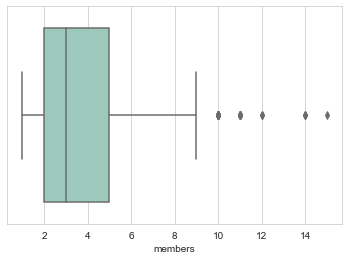

In [53]:
sns.boxplot(df['members'])

<AxesSubplot:xlabel='hh_02', ylabel='weight'>

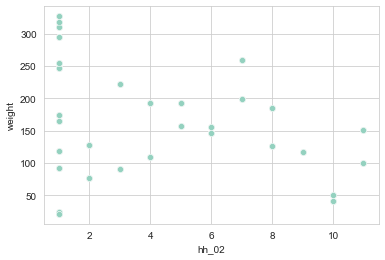

In [54]:
sns.scatterplot(data=df, x='hh_02', y='weight')

<AxesSubplot:xlabel='weight', ylabel='Count'>

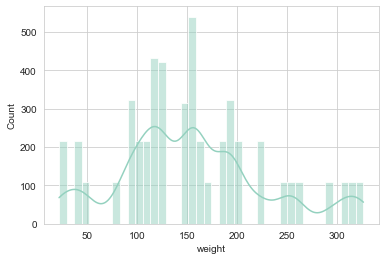

In [55]:
sns.histplot(data=df, x='weight', bins=40, kde=True)

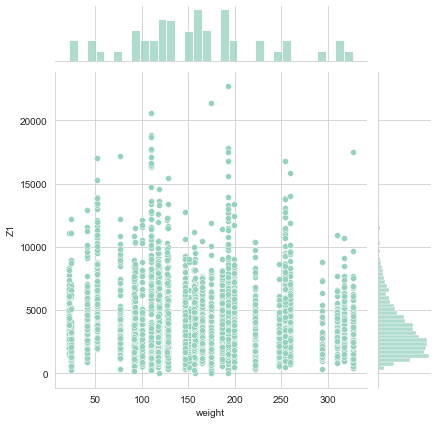

In [22]:
sns.jointplot(x='weight', y='Z1', data=df)

In [ ]:
sns.pairplot(df)

: 

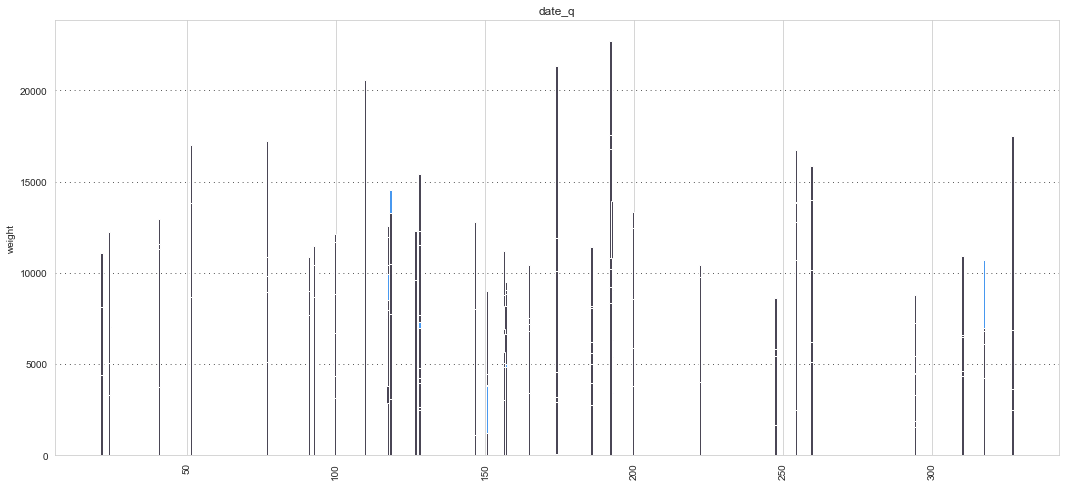

In [56]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
color_map = ["#4A4655" for _ in range(33)]
color_map[0] = "#4898EF"
plt.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
plt.bar(df["weight"], df['Z1'],color=color_map)
plt.ylabel("weight")
plt.title("date_q")
plt.show()

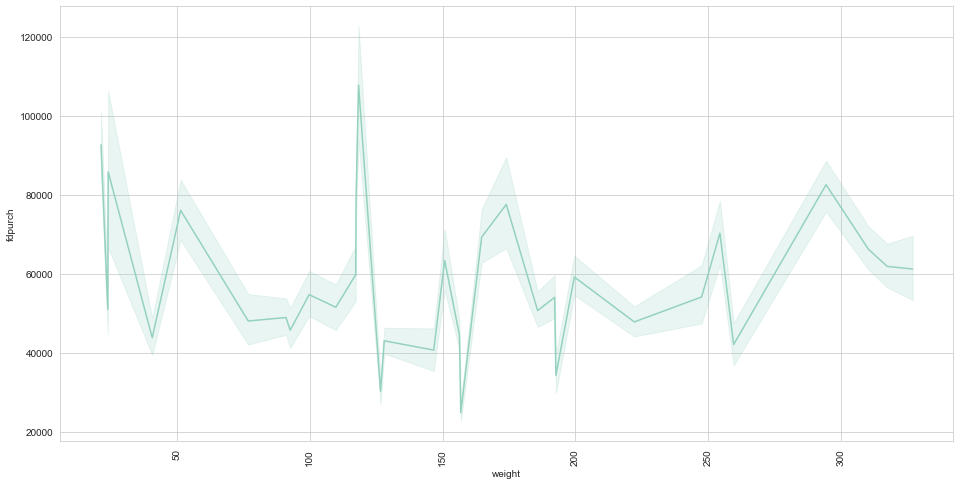

In [57]:
plt.figure(figsize = (16,8))
plt.xticks(rotation=90)
sns.lineplot(x="weight", y = "fdpurch", data = df)
plt.show()

In [58]:
df.columns

Index(['interview__key', 'date_q', 'hh_02', 'settlement', 'members', 'memnal',
       'weight', 'fdpurch', 'fdcons', 'fdout', 'Z1', 'nfdpurch', 'nonfdgif',
       'durble', 'expend', 'monincome', 'totincome', 'nonmoninc',
       'y1_3amd.1.00', 'y1_3amd.2.00', 'y1_3amd.3.00', 'y1_3amd.4.00',
       'y1_3amd.6.00', 'y1_3amd.8.00', 'y1_3amd.9.00', 'y1_3amd.10.00',
       'y1_3amd.13.00', 'y1_3amd.14.00', 'y1_3amd.15.00', 'y1_3amd.17.00',
       'y1_3amd.18.00', 'y1_3amd.19.00', 'y1_3amd.23.00', 'y1_3amd.28.00',
       'hhch_0_3_sum', 'hhch_4_5_sum', 'hhch_6_11_sum', 'hhch_12_17_sum',
       'hheld_63_65_sum', 'hheld_66_70_sum', 'hheld_71_80_sum',
       'hheld_over81_sum', 'hheld_over63_sum', 'headsex', 'headeduc',
       'headmerstatus', 'headage', 'aec_r', 'poverty', 'pweight', 'ae_r',
       'hous_01', 'hous_13', 'hous_16', 'hous_29_1n', 'hous_29_2n',
       'hous_29_3n', 'hous_29_4n', 'hous_29_5n', 'hous_29_6n', 'hous_39',
       'hous_44', 'soc_01', 'soc_05', 'hous_47_8'],
      dty

In [59]:
df_5 = df.nlargest(5, 'fdcons')
df_5

,interview__key,date_q,hh_02,settlement,members,memnal,weight,fdpurch,fdcons,fdout,...,hous_29_2n,hous_29_3n,hous_29_4n,hous_29_5n,hous_29_6n,hous_39,hous_44,soc_01,soc_05,hous_47_8
676,12-96-83-81,2019.01,6,2,6,6,146.666667,4127.976190,147600.133929,0.000000,...,0.0,0.0,0.0,0.0,1.0,2,3,1,3.0,1.0
4885,94-45-38-72,2019.03,11,2,5,5,99.796296,62462.797619,140539.608347,4345.238095,...,0.0,0.0,0.0,0.0,1.0,4,3,2,5.0,1.0
3498,67-92-09-91,2019.12,6,1,4,4,156.330247,11071.666667,135622.158183,16577.083333,...,0.0,1.0,0.0,0.0,0.0,1,3,2,5.0,1.0
4193,81-14-05-89,2019.04,10,2,3,3,40.745370,40519.345238,135402.504399,0.000000,...,0.0,1.0,0.0,1.0,0.0,1,2,2,6.0,1.0
5131,99-31-15-32,2019.01,6,2,6,6,146.666667,0.000000,133383.358585,0.000000,...,0.0,0.0,0.0,0.0,1.0,1,3,1,16.0,2.0


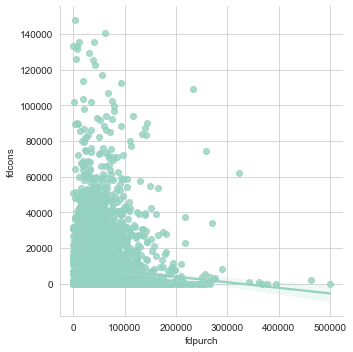

In [60]:
sns.lmplot(x='fdpurch', y = 'fdcons', data=df)

In [61]:
df.corr()

,date_q,hh_02,settlement,members,memnal,weight,fdpurch,fdcons,fdout,Z1,...,hous_29_2n,hous_29_3n,hous_29_4n,hous_29_5n,hous_29_6n,hous_39,hous_44,soc_01,soc_05,hous_47_8
date_q,1.000000,0.002320,0.001203,0.014408,0.003747,-0.001881,0.121958,-0.070970,0.001732,-0.176182,...,0.066024,0.019418,0.002077,-0.063863,0.073690,-0.041727,-0.037096,0.009297,-0.020923,-0.017394
hh_02,0.002320,1.000000,0.338585,0.012249,-0.005819,-0.341276,-0.092547,0.295483,-0.175435,-0.016726,...,-0.153281,-0.220892,0.007498,0.071749,0.338149,0.210912,0.011764,-0.049973,-0.017352,-0.094512
settlement,0.001203,0.338585,1.000000,0.130696,0.098665,-0.114526,-0.209423,0.461581,-0.145519,-0.050233,...,-0.306539,-0.366310,0.025850,0.103453,0.594126,0.601064,0.127944,-0.050161,-0.011005,-0.135666
members,0.014408,0.012249,0.130696,1.000000,0.961250,-0.022099,0.376925,0.247824,0.063265,0.346611,...,-0.146026,-0.009228,0.015400,0.012757,0.130713,0.064021,-0.071645,-0.071808,0.008850,-0.007309
memnal,0.003747,-0.005819,0.098665,0.961250,1.000000,-0.013877,0.402036,0.236872,0.079242,0.351695,...,-0.129314,0.001608,0.014258,0.015375,0.106405,0.043778,-0.070618,-0.075718,0.003567,-0.003816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hous_39,-0.041727,0.210912,0.601064,0.064021,0.043778,-0.088741,-0.147499,0.297122,-0.102871,0.025496,...,-0.218535,-0.244916,0.014818,0.097546,0.380020,1.000000,0.122958,-0.029285,0.024492,-0.102739
hous_44,-0.037096,0.011764,0.127944,-0.071645,-0.070618,0.071628,-0.207203,0.056087,-0.082200,-0.146010,...,0.019098,-0.233296,0.004727,0.017232,0.201413,0.122958,1.000000,-0.166818,-0.017376,0.085065
soc_01,0.009297,-0.049973,-0.050161,-0.071808,-0.075718,0.013861,0.127498,-0.030051,0.077577,0.031118,...,0.001854,0.091351,-0.002826,-0.002730,-0.069817,-0.029285,-0.166818,1.000000,-0.044956,-0.005917
soc_05,-0.020923,-0.017352,-0.011005,0.008850,0.003567,0.019259,-0.007844,-0.008667,-0.004548,0.014926,...,-0.006272,0.013100,-0.000604,-0.001422,-0.009938,0.024492,-0.017376,-0.044956,1.000000,-0.006258


Text(0.5, 1.0, 'Correlation Heatmap')

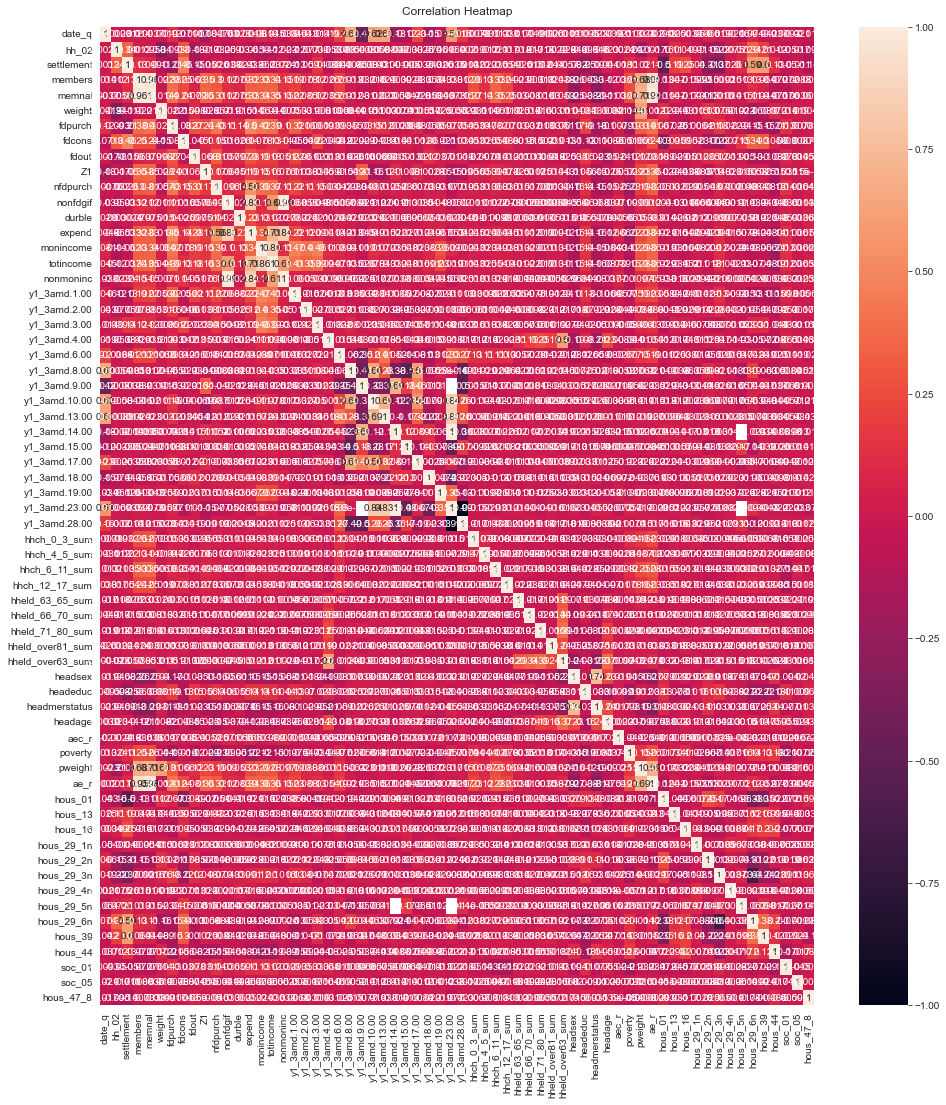

In [62]:
plt.figure(figsize=(16, 18))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [20]:
df.columns

Index(['interview__key', 'date_q', 'hh_02', 'settlement', 'members', 'memnal',
       'weight', 'fdpurch', 'fdcons', 'fdout', 'Z1', 'nfdpurch', 'nonfdgif',
       'durble', 'expend', 'monincome', 'totincome', 'nonmoninc',
       'y1_3amd.1.00', 'y1_3amd.2.00', 'y1_3amd.3.00', 'y1_3amd.4.00',
       'y1_3amd.6.00', 'y1_3amd.8.00', 'y1_3amd.9.00', 'y1_3amd.10.00',
       'y1_3amd.13.00', 'y1_3amd.14.00', 'y1_3amd.15.00', 'y1_3amd.17.00',
       'y1_3amd.18.00', 'y1_3amd.19.00', 'y1_3amd.23.00', 'y1_3amd.28.00',
       'hhch_0_3_sum', 'hhch_4_5_sum', 'hhch_6_11_sum', 'hhch_12_17_sum',
       'hheld_63_65_sum', 'hheld_66_70_sum', 'hheld_71_80_sum',
       'hheld_over81_sum', 'hheld_over63_sum', 'headsex', 'headeduc',
       'headmerstatus', 'headage', 'aec_r', 'poverty', 'pweight', 'ae_r',
       'hous_01', 'hous_13', 'hous_16', 'hous_29_1n', 'hous_29_2n',
       'hous_29_3n', 'hous_29_4n', 'hous_29_5n', 'hous_29_6n', 'hous_39',
       'hous_44', 'soc_01', 'soc_05', 'hous_47_8'],
      dty

In [63]:
y = df['date_q']
x = df[['headsex',
        'members',
        'weight']]

x = sm.add_constant(x)
x.head()

,const,headsex,members,weight
0,1.0,2.0,4,156.330247
1,1.0,2.0,1,199.569444
2,1.0,2.0,1,164.703704
3,1.0,1.0,3,185.768519
4,1.0,1.0,5,126.657407


In [64]:
model = sm.OLS(y, x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 date_q   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7543
Date:                Fri, 03 Jun 2022   Prob (F-statistic):              0.520
Time:                        23:48:45   Log-Likelihood:                 10073.
No. Observations:                5165   AIC:                        -2.014e+04
Df Residuals:                    5161   BIC:                        -2.011e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2019.0627      0.002   9.34e+05      0.000    2019.058    2019.067
headsex        0.0011      0.001      1.086      0.278      -0.001       0.003
members        0.0003      0.000      1.280      0.201      -0.000       0.001
weight     -9.823e-07   6.54e-06     -0.150      0.881   -1.38e-05    1.18e-05
==============================================================================
Omnibus:                     5001.185   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.948
Skew:                          -0.001   Prob(JB):                     1.50e-69
Kurtosis:                       1.786   Cond. No.                         832.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
result.params

const      2.019063e+03
headsex    1.143511e-03
members    3.250417e-04
weight    -9.822911e-07
dtype: float64

In [66]:
result.model.exog_names

['const', 'headsex', 'members', 'weight']

eval_env: 1


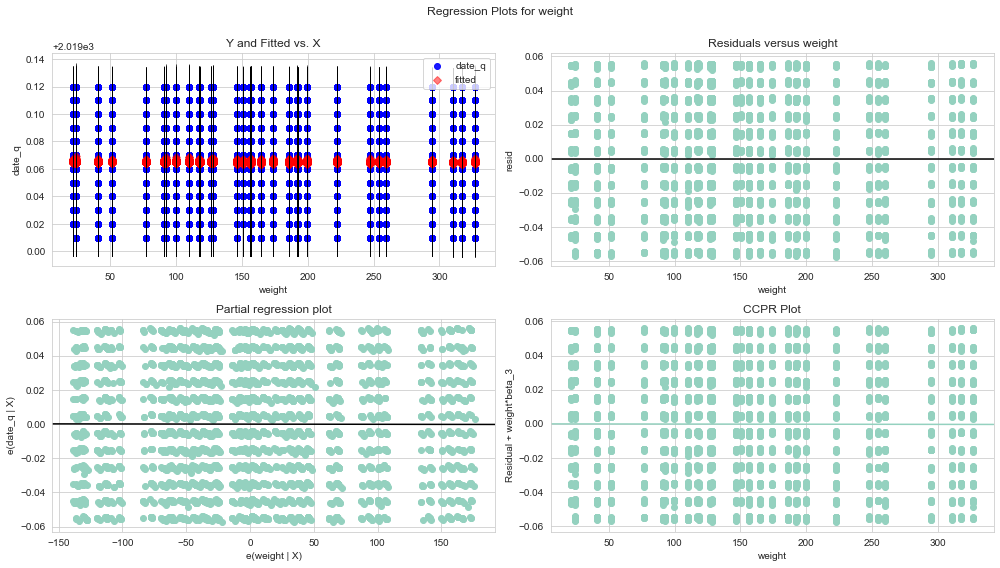

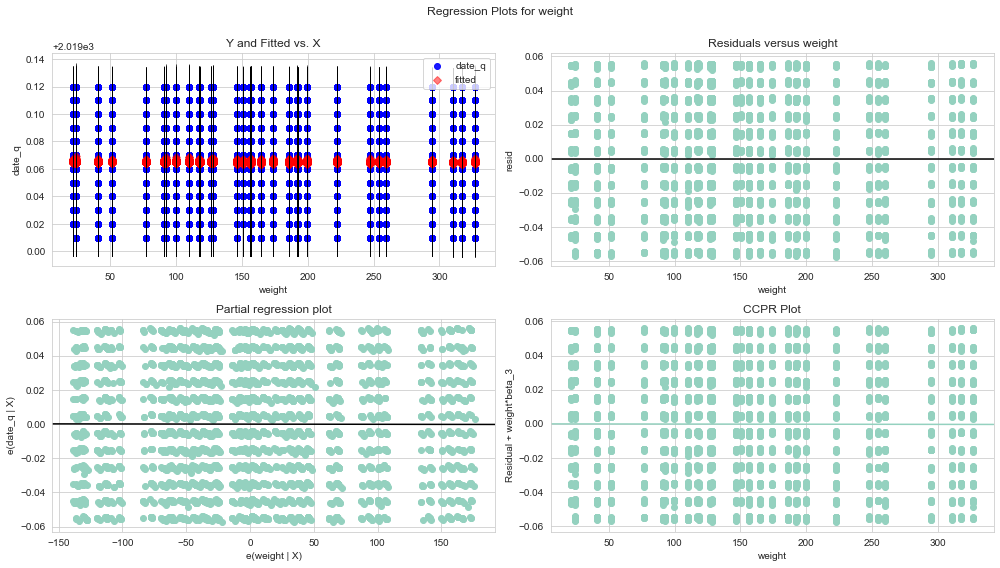

In [68]:
# modify figure size
fig = plt.figure(figsize=(14, 8))
sm.graphics.plot_regress_exog(result, 'weight', fig=fig)

In [69]:
het_goldfeldquandt(result.model.endog, result.model.exog)

(0.9774140906982205, 0.7190270897616187, 'increasing')

In [70]:
vif = [variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns[1:]]

In [71]:
x.columns

Index(['const', 'headsex', 'members', 'weight'], dtype='object')

In [72]:
vif

[1.0745764385736511, 1.073421307003869, 1.0017144163639056]

In [73]:
tol = [1./variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]

<AxesSubplot:ylabel='Count'>

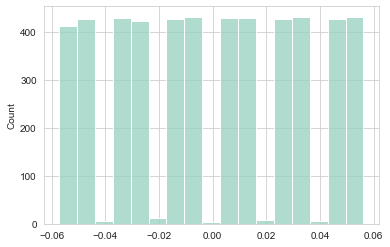

In [74]:
sns.histplot(result.resid)

<AxesSubplot:>

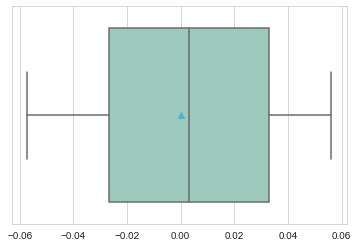

In [75]:
sns.boxplot(x=result.resid, showmeans=True)

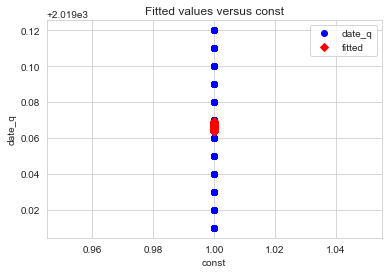

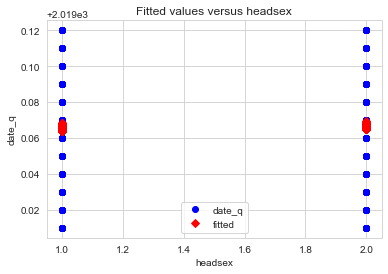

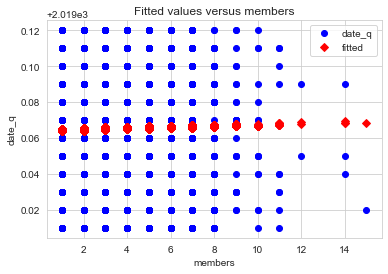

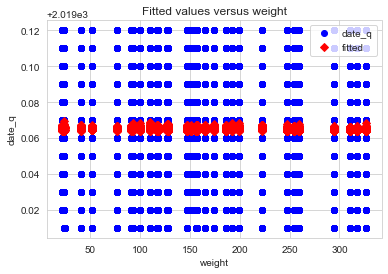

In [76]:
for i in range(4):
    sm.graphics.plot_fit(result, i, vlines=False)